In [18]:
!pip install pandas mplfinance ipywidgets

In [19]:
import pandas as pd
import mplfinance as mpf
import logging
import os

# Set up basic logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Configuration
DATA_DIR = './stock_data/'

load data

In [20]:
TICKER = 'AAPL'  # Specify your ticker here

# Load CSV
csv_path = os.path.join(DATA_DIR, f'{TICKER}.csv')
try:
    df = pd.read_csv(csv_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    logger.info(f'Loaded {len(df)} records for {TICKER} from {csv_path}')
except Exception as e:
    logger.error(f'Error loading {TICKER}: {e}')
    df = pd.DataFrame()

df

2025-06-10 18:04:54,400 - INFO - Loaded 3534560 records for AAPL from ./stock_data/AAPL.csv
2025-06-10 18:04:54,400 - INFO - Loaded 3534560 records for AAPL from ./stock_data/AAPL.csv


,timestamp,open,high,low,close,volume,vwap,transactions,otc
0,2003-09-10 08:00:00,0.3994,0.3994,0.3994,0.3994,5600.0,0.3994,1,NaN
1,2003-09-10 08:51:00,0.3982,0.3982,0.3982,0.3982,22400.0,0.3982,1,NaN
2,2003-09-10 09:13:00,0.3977,0.3977,0.3977,0.3977,67200.0,0.3977,1,NaN
3,2003-09-10 09:25:00,0.3973,0.3982,0.3973,0.3982,11200.0,0.3978,2,NaN
4,2003-09-10 09:29:00,0.3975,0.3975,0.3970,0.3970,207200.0,0.3971,10,NaN
...,...,...,...,...,...,...,...,...,...
3534555,2025-06-10 09:17:00,201.1800,201.2500,201.1800,201.2500,3485.0,201.2019,97,NaN
3534556,2025-06-10 09:18:00,201.2493,201.2496,201.2450,201.2496,656.0,201.2413,40,NaN
3534557,2025-06-10 09:19:00,201.2500,201.3000,201.2000,201.2000,4701.0,201.2711,129,NaN
3534558,2025-06-10 09:20:00,201.2539,201.2539,201.2000,201.2000,1541.0,201.2176,57,NaN


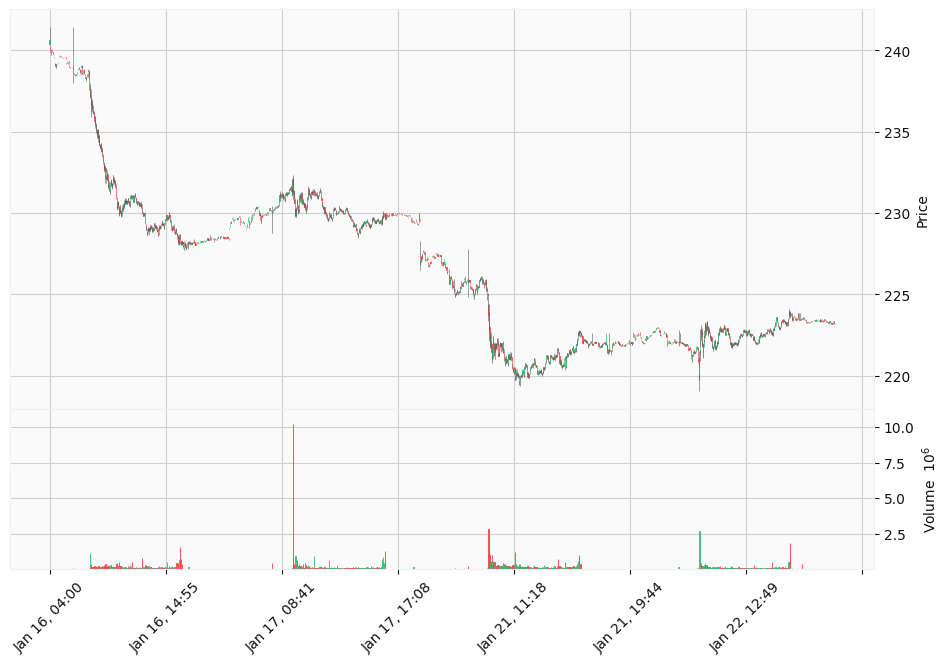

2025-06-10 18:04:57,129 - INFO - Plotted candlestick chart for AAPL from 2025-01-16 to 2025-01-23
2025-06-10 18:04:57,129 - INFO - Plotted candlestick chart for AAPL from 2025-01-16 to 2025-01-23


In [21]:
START_DATE = '2025-01-16'  # Specify start date (YYYY-MM-DD)
END_DATE = '2025-01-23'  # Specify end date (YYYY-MM-DD)

# Filter by date range
df_slice = df[(df['timestamp'] >= START_DATE) & (df['timestamp'] <= END_DATE)]
# Prepare data for plotting
df_slice.set_index('timestamp', inplace=True)
df_slice = df_slice[['open', 'high', 'low', 'close', 'volume']]
# Plot candlestick chart
mpf.plot(
    df_slice,
    type='candle',
    style='yahoo',
    volume=True,
    warn_too_much_data=1000000,
    figsize=(12, 8),  # Set canvas size (width=12 inches, height=8 inches)
)
logger.info(f'Plotted candlestick chart for {TICKER} from {START_DATE} to {END_DATE}')